## VIVEK'ALGO

### PREDICTING FUTURE CONFIRM COVID CASES
#### USING POLYNOMIAL REGRESSIOIN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
import seaborn as sns

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
#init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

#### Taking data from John Hopkins research centre

In [4]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-25-2020.csv')

In [8]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()


In [9]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [10]:
dates = confirmed.keys()
india_cases = []
india_deaths = []
india_recoveries = []
mortality_rate= []
death_rate=[]
active_india=[]

In [11]:
for i in dates:
    confirmed_india=confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum()
    death_india=deaths_reported[deaths_reported['Country/Region']=='India'][i].sum()
    recovered_sum=recovered_cases[recovered_cases['Country/Region']=='India'][i].sum()
    mortality_rate.append(death_rate/confirmed_india)
    death_rate.append(recovered_sum/death_india)
    active_india.append(confirmed_india-death_india-recovered_sum)
    
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    

C:\hp\BIN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\hp\BIN\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in longlong_scalars



In [12]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

start = '22/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

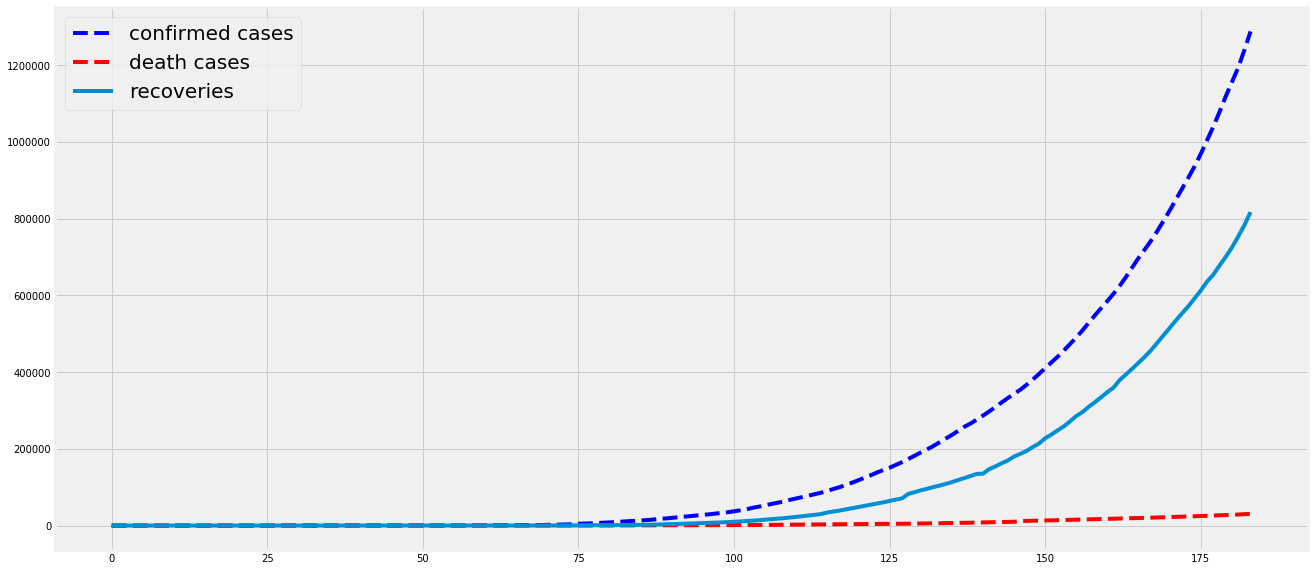

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(adjusted_dates,india_cases,'b--',label='confirmed cases')
plt.plot(adjusted_dates,india_deaths,'r--',label='death cases')
plt.plot(adjusted_dates,india_recoveries,label='recoveries')
plt.legend(loc=2, prop={'size': 20})

In [14]:
def daily_increase(data):
    d=[]
    for i in range(len(data)):
        if i==0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [15]:
daily_increase_india=daily_increase(india_cases)
daily_death_india=daily_increase(india_deaths)
daily_recoveries_india=daily_increase(india_recoveries)

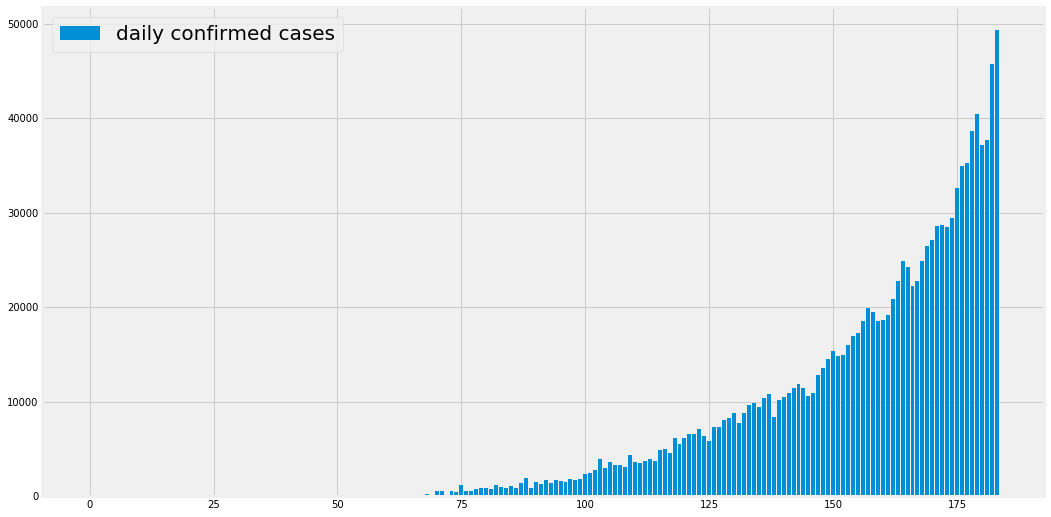

In [16]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates,daily_increase_india,label='daily confirmed cases')
#plt.plot(daily_death_india,'r--',label='daily death cases')
#plt.plot(daily_recoveries_india,label='daily recoveries')
plt.legend(loc=2, prop={'size': 20})

In [17]:
dff=pd.DataFrame({'x':future_forecast_dates[:-20],'y':daily_increase_india})
dff.iplot(kind='line',x='x',y='y',mode='markers',size=10)

In [19]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
india_cases = np.array(india_cases).reshape(-1, 1)
india_deaths = np.array(india_deaths).reshape(-1, 1)
india_recoveries = np.array(india_recoveries).reshape(-1, 1)

### Predicting Model

In [20]:
X=days_since_1_22
y=india_cases

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly=PolynomialFeatures(degree=4)
poly_X_train=poly.fit_transform(X_train)
poly_X_test=poly.fit_transform(X_test)
poly_future_forecast=poly.fit_transform(future_forecast)

lm=LinearRegression(normalize=True, fit_intercept=False)
lm.fit(poly_X_train,y_train)
test_linear_pred = lm.predict(poly_X_test)
linear_pred = lm.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test))
print('MSE:',mean_squared_error(test_linear_pred, y_test))

MAE: 5274.165044723722
MSE: 41777536.2780785


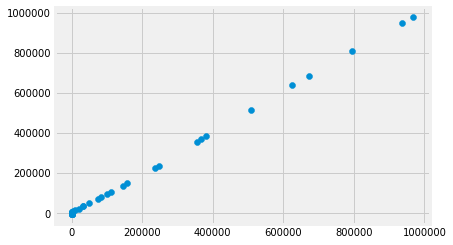

In [21]:
plt.scatter(y_test,test_linear_pred)

In [22]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('coronavirus cases in india till now', size=30)
    plt.xlabel('Days', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

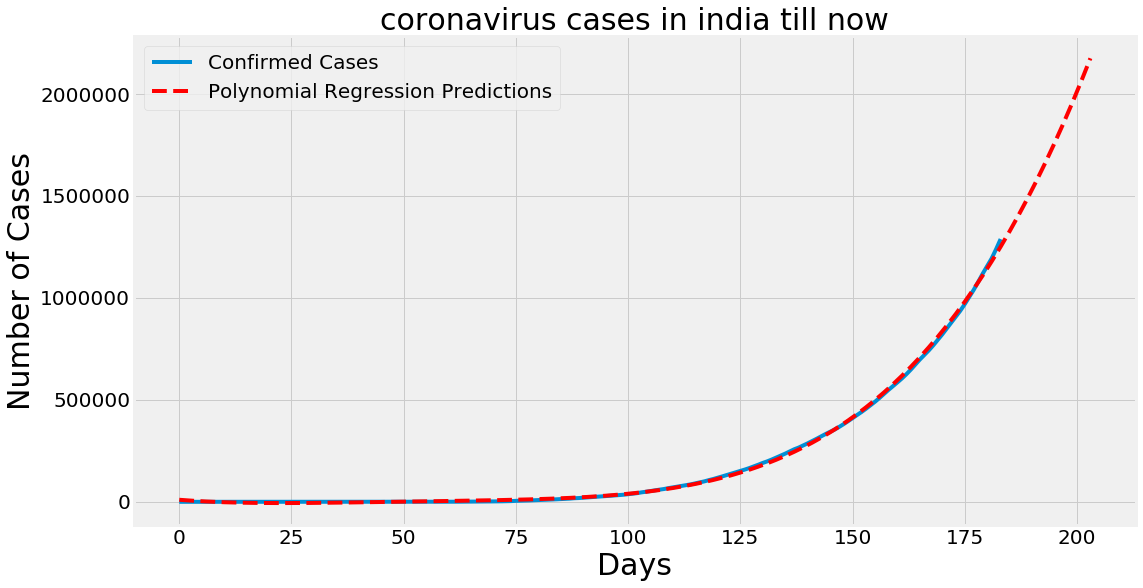

In [23]:
plot_predictions(adjusted_dates, india_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

In [24]:
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases in India': np.round(linear_pred[-21:-1])})
poly_df

,Date,Predicted number of Confirmed Cases in India
0,24/07/2020,1250595.0
1,25/07/2020,1287984.0
2,26/07/2020,1326219.0
3,27/07/2020,1365314.0
4,28/07/2020,1405282.0
5,29/07/2020,1446136.0
6,30/07/2020,1487888.0
7,31/07/2020,1530552.0
8,01/08/2020,1574142.0
9,02/08/2020,1618669.0
